# Regresión lineal

## **Ejercicio:**

El objetivo de este ejercicio es hallar un modelo de regresión lineal utilizando gradiente descendiente implementando este algoritmo. Adicionalmente, implementar también el gradiente descendiente estocástico.

1) Carga la data del archivo *california_housing_train.csv*. Halla el número de filas y de columnas.

2) Crea una matriz $X$ que contenga todas las columnas excepto a *median_house_value*.  

3) Crea un vector $y$ que contenga la columna *median_house_value*.

4) Inicializa de manera aleatoria el vector $\beta_0$ que contiene a los parámetros de la función lineal.

5) Implementa el algoritmo de gradiente descendiente para la regresión lineal en una función. Para ello considera:


*   Los inputs deben ser: $X$, $y$, $\beta_0$, el tamaño de paso, la tolerancia y el máximo de iteraciones.
* Estandarice $X$ e $y$.
* Hallar los coeficientes del modelo estandarizado
* Hallar los coeficientes originales.
*   Una condición de parada para el algoritmo.
*   Que grafique los valores de la función objetivo (MSE) con respecto al número de iteración.

Luego utiliza la función con un valor adecuado para el tamaño de paso.

6) Comprueba los valores de $\beta$ utilizando la función *LinearRegression* de *sklearn.linear_model*


In [ ]:
import pandas as pd

data=pd.read_csv("sample_data/california_housing_train.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [ ]:
y=np.array(data[["median_house_value"]])
y

array([[ 66900.],
       [ 80100.],
       [ 85700.],
       ...,
       [103600.],
       [ 85800.],
       [ 94600.]])

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
X=np.array(data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])

In [ ]:
X

array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
           1.4936],
       [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
           1.82  ],
       [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
           1.6509],
       ...,
       [-124.3   ,   41.84  ,   17.    , ..., 1244.    ,  456.    ,
           3.0313],
       [-124.3   ,   41.8   ,   19.    , ..., 1298.    ,  478.    ,
           1.9797],
       [-124.35  ,   40.54  ,   52.    , ...,  806.    ,  270.    ,
           3.0147]])

In [ ]:
X.shape

(17000, 8)

In [ ]:
scaler_X=StandardScaler()
X_stand=scaler_X.fit_transform((X))
X_stand

array([[ 2.619365  , -0.67152023, -1.07967114, ..., -0.36118401,
        -0.07599796, -1.25254316],
       [ 2.53956878, -0.57326437, -0.76187201, ..., -0.26186523,
        -0.09940441, -1.08148298],
       [ 2.4946834 , -0.90546278, -0.92077158, ..., -0.95535424,
        -0.99925206, -1.17010515],
       ...,
       [-2.36291168,  2.90780067, -0.92077158, ..., -0.16167524,
        -0.11760942, -0.44666313],
       [-2.36291168,  2.88908527, -0.76187201, ..., -0.1146295 ,
        -0.06039367, -0.99778717],
       [-2.387848  ,  2.29955006,  1.85997083, ..., -0.54326844,
        -0.60134255, -0.45536288]])

In [ ]:
def regresion_lineal_GD(X, y, alpha, epsilon, max_iter):
  # X, y numpy.array
  # beta_0 coeficientes iniciales
  # alpha tamaño de paso
  # epsilon: tolerancia
  # max_iter: máximo de iteraciones

  # Estandarizamos la data
  scaler_X=StandardScaler()
  X_stand=scaler_X.fit_transform((X))
  X_stand

  scaler_y=StandardScaler()
  y_stand=scaler_y.fit_transform((y))
  y_stand

  # Número de filas
  nrow=X.shape[0]

  # Inicializamos los valores

  valores=[]

  # Inicializamos los beta

  beta=norm.rvs(size=X.shape[1])
  tol=epsilon+1

  # Inicializamos iteraciones

  iter=0

  while (tol>epsilon and iter<max_iter):
    iter+=1

    # Gradiente
    y_hat=np.matmul(X_stand, np.transpose(beta))
    r=y_stand.flatten()-y_hat
    grad=(-2/nrow)*np.matmul(np.transpose(X_stand), r)

    # Funcion objetivo
    R=(1/nrow)*np.linalg.norm(r)**2
    valores.append(R)

    # Actualizacion
    beta=beta-alpha*grad
    tol=np.linalg.norm(alpha*grad)

  if iter==max_iter:
    print("El método no convergió en", max_iter, "iteraciones.")

  # Convertimos los beta de la data estandarizada a los de la regresión original

  coef=beta*(scaler_y.scale_)/scaler_X.scale_
  intercepto=np.mean(y-np.matmul(X, coef))

  # Graficamos los valores de la función
  plt.plot(valores)

  return coef, intercepto

(array([-4.31396263e+04, -4.29256652e+04,  1.15069480e+03, -8.37822634e+00,
         1.17647873e+02, -3.84888183e+01,  4.54367282e+01,  4.05070603e+04]),
 -3620599.8281332524)

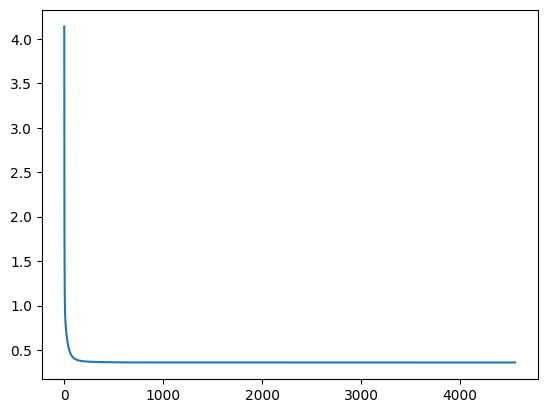

In [ ]:
alpha=0.1
epsilon=10**-8
max_iter=10**4
regresion_lineal_GD(X, y, alpha, epsilon, max_iter)

In [ ]:
from sklearn.linear_model import LinearRegression

mod=LinearRegression().fit(X, y)

In [ ]:
mod.coef_

array([[-4.31396373e+04, -4.29256731e+04,  1.15069493e+03,
        -8.37825121e+00,  1.17648543e+02, -3.84887721e+01,
         4.54360026e+01,  4.05070684e+04]])

In [ ]:
mod.intercept_

array([-3620600.89297391])

# Gradiente Descendiente Estocástico

In [ ]:
  scaler_X=StandardScaler()
  X_stand=scaler_X.fit_transform((X))
  X_stand

  scaler_y=StandardScaler()
  y_stand=scaler_y.fit_transform((y))
  y_stand

array([[-1.21055773],
       [-1.09674535],
       [-1.04846131],
       ...,
       [-0.89412482],
       [-1.04759909],
       [-0.97172417]])

Cantidad de filas

In [ ]:
n=len(X_stand)

In [ ]:
filas=list(np.arange(n))

In [ ]:
import random

Tamaño de batch $m$. Seleccionamos las filas del batch.

In [ ]:
m=100
batch=random.sample(filas, k=m)
X_batch=X_stand[batch,:]

In [ ]:
y_batch=y[batch]

In [ ]:
filas=list(set(filas)-set(batch))

In [ ]:
filas=[k for k in filas if k not in batch]

In [ ]:
len(filas)<len(batch)

0

In [ ]:
def regresion_lineal_SGD(X, y, batch_size, alpha, max_epocas):
  # Gradiente descendiente estocástico
  # X, y numpy.array
  # batch_size: tamaño del batch
  # alpha tamaño de paso
  # max_epocas: cantidad de veces que recorremos la data

  # Estandarizamos la data
  scaler_X=StandardScaler()
  X_stand=scaler_X.fit_transform((X))
  X_stand

  scaler_y=StandardScaler()
  y_stand=scaler_y.fit_transform((y))
  y_stand

  # Número de filas
  nrow=X.shape[0]

  # Inicializamos los valores

  valores=[]

  # Inicializamos los beta

  beta=norm.rvs(size=X.shape[1])
  tol=epsilon+1

  # Inicializamos iteraciones

  iter=0

  for i in range(max_epocas):
  # Lista de filas

    filas=list(np.arange(nrow))

    while (len(filas)>0):

      iter+=1

      # Seleccionamos el batch

      if (len(filas)>batch_size):
        batch=random.sample(filas, k=batch_size)
      if (len(filas)<=batch_size):
        batch=filas
      filas=list(set(filas)-set(batch))

      # Seleccionamos las filas correspondientes de X e y
      X_batch=X_stand[batch, :]
      y_batch=y_stand[batch, :]

      # Aproximación del gradiente
      y_hat=np.matmul(X_batch, np.transpose(beta))
      r_batch=y_batch.flatten()-y_hat
      grad_aprox=(-2/batch_size)*np.matmul(np.transpose(X_batch), r_batch)

      # Funcion objetivo
      y_hat=np.matmul(X_stand, np.transpose(beta))
      r=y_stand.flatten()-y_hat
      R=(1/nrow)*np.linalg.norm(r)**2
      valores.append(R)

      # Actualizacion
      beta=beta-alpha*grad_aprox
      tol=np.linalg.norm(alpha*grad_aprox)

  # Convertimos los beta de la data estandarizada a los de la regresión original

  coef=beta*(scaler_y.scale_)/scaler_X.scale_
  intercepto=np.mean(y-np.matmul(X, coef))

  # Graficamos los valores de la función
  plt.plot(valores)

  return coef, intercepto, valores

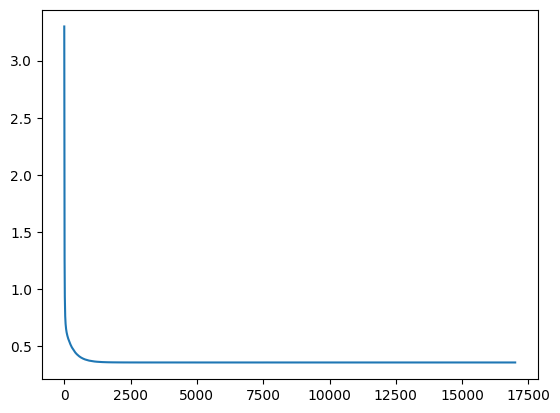

In [ ]:
alpha=0.01
batch_size=1000
max_epocas=1000
coef, intercepto, valores=regresion_lineal_SGD(X, y, batch_size, alpha, max_epocas)

In [ ]:
coef

array([-4.31280553e+04, -4.29280745e+04,  1.15420242e+03, -8.39268572e+00,
        1.17260267e+02, -3.84720015e+01,  4.55262860e+01,  4.04901633e+04])

In [ ]:
mod.coef_

array([[-4.31396373e+04, -4.29256731e+04,  1.15069493e+03,
        -8.37825121e+00,  1.17648543e+02, -3.84887721e+01,
         4.54360026e+01,  4.05070684e+04]])